In [72]:
import datetime
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap
from palettable import colorbrewer
import matplotlib as mpl
import matplotlib.colors as colors
import cartopy.crs as ccrs
#from cartopy.examples.arrows import sample_data
#for movie
import holoviews as hv
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
#from palettable import colorbrewer
from sklearn.cluster import DBSCAN
#import geopy.distance


In [73]:
#climatology
dir_data = 'F:/data/sat_data/oscar/L4/oscar_third_deg/'
#filename = dir_data + 'climatology_1993_2018_monthly_data_oscar.nc'
filename = dir_data + 'climatology/climatology_2000_2018_monthly_data_oscar.nc'
ds=xr.open_dataset(filename)
ds.close()
ds = ds.sel(lon=slice(110,250),lat=slice(65,5))
#    masked = ds_in.where(np.isfinite(clim_in))
#ds.plot()


In [135]:
#5-day data3
dir_data = 'F:/data/sat_data/oscar/L4/oscar_third_deg/'
for lyr in range(2000,2018): #2019): #2017):
    filename = dir_data + 'oscar_vel' + str(lyr).zfill(4) + '.nc'
    ds=xr.open_dataset(filename,drop_variables=['um','vm'])
    ds = ds.rename({'longitude':'lon','latitude':'lat'})
    ds = ds.drop('year')
    ds['spd']=np.sqrt(ds.u*ds.u+ds.v*ds.v)
    ds_subset = ds.sel(lon=slice(110,250),lat=slice(65,45))
    ds.close()
    if lyr==2000:
        ds_all = ds_subset
    else:
        ds_all=xr.concat([ds_all,ds_subset],'time')
   

In [74]:
#put 5 day data into one big array or next section is for monthly (smaller)
#I'd like to use xarray open_mfdataset rather than loop over all the files but the files are not
#formatted correctly.  there is both year and time for some reason and it confuses the concat.
#put monthly data into one big array
#dir_data = 'F:/data/sat_data/oscar/L4/oscar_third_deg/*.nc'
#ds_all2 = xr.open_mfdataset(dir_data, chunks=None, concat_dim='time')
#ds_all2 = ds_all2.sel(depth=15)

#so instead, let's loop....

#put monthly data into one big array
dir_data = 'F:/data/sat_data/oscar/L4/oscar_third_deg/'
for lyr in range(1993,2018): #2019): #2017):
    filename = dir_data + 'monthly/' + str(lyr) + 'monthly_data_oscar.nc'
    ds=xr.open_dataset(filename)
    ds_subset = ds.sel(lon=slice(120,250),lat=slice(65,15))
    ds.close()
    if lyr==1993:
        ds_all = ds_subset
    else:
        ds_all=xr.concat([ds_all,ds_subset],'time')
#ds_all = ds_all.sel(depth=15)

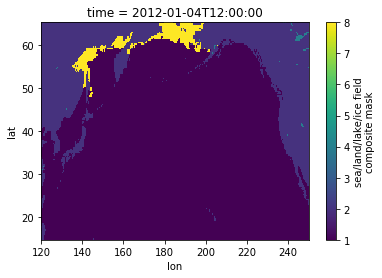

In [75]:
#get a lank mask for the oscar data
ds=xr.open_dataset('F:/data/sst/cmc/CMC0.2deg/v2/2012/004/20120104120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc')
ds.close()
ds = ds.mask.isel(time=0)
ds.coords['lon'] = np.mod(ds['lon'], 360)
ds = ds.sortby(ds.lon)
landmask = ds.interp_like(ds_all,method='nearest')
landmask.plot()

In [5]:
ds_all['mask']=landmask

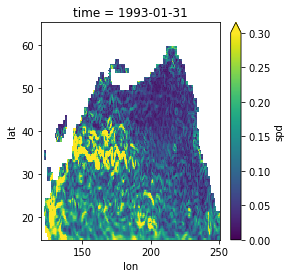

In [6]:
fig, axarr = plt.subplots(1,1,figsize=(4,4))
ds_all.spd[0,:,:].plot(vmin=0,vmax=.3)
fig.savefig('F:/data/NASA_biophysical/telecon_figs/' + 'map.png', dpi=100)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
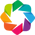

:DynamicMap   [depth,time]
   :Image   [lon,lat]   (spd)

In [143]:
import holoviews as hv
from holoviews.operation.datashader import regrid
hv.extension('bokeh')
ds_subset = ds_all.sel(time=slice('1999-10-31','2017-12-31'),lon=slice(185,235),lat=slice(60,49))
dataset = hv.Dataset(ds_subset.spd)
hv_im = (dataset.to(hv.Image, ['lon', 'lat'], dynamic=True)
                .redim.range(sla=(0.25, 0.15))
                .options(cmap='RdBu_r', width=900, height=450, colorbar=True))

%output holomap='scrubber' fps=12
regrid(hv_im, precompute=True)

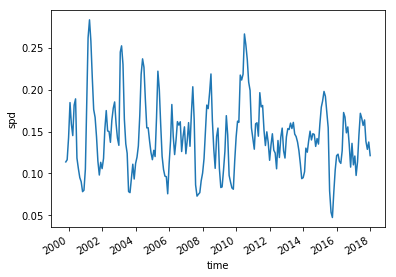

In [108]:
ds_subset.spd.sel(lon=slice(220,224),lat=slice(57.6,56.4)).mean({'lat','lon'}).plot()


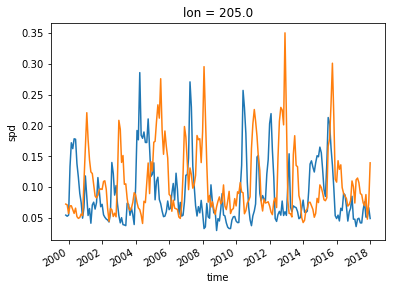

In [117]:
ds_subset.spd.sel(lon=210,lat=slice(56.4,54.4)).mean('lat').plot()
#ds_subset.spd.sel(lon=200,lat=slice(54,52)).mean('lat').plot()
#plt.legend()
ds_subset.spd.sel(lon=205,lat=slice(55,53)).mean('lat').plot()
#ds_subset.spd.sel(lon=190,lat=slice(53,50)).mean('lat').plot()


In [132]:
#calculate the lag correlation
for i in range(20):
    x1=ds_subset.spd.sel(lon=210,lat=slice(56.4,54.4)).mean('lat').shift(time=i)
    x2=ds_subset.spd.sel(lon=205,lat=slice(55,53)).mean('lat')
    x2=x2[np.isfinite(x1)]
    x1=x1[np.isfinite(x1)]
    print(i,np.corrcoef(x1,x2)[1,0])

0 -0.11322049002504818
1 -0.10501499637698813
2 -0.0778074247394086
3 -0.01074928380281195
4 0.09474359103420303
5 0.23914724426534012
6 0.37070043166879346
7 0.46120074336925004
8 0.5661565345084363
9 0.5926608338293895
10 0.5572547509298627
11 0.4376459066638359
12 0.3150509943972082
13 0.19756449614795799
14 0.12265407504211584
15 0.10546490469278878
16 0.06560250047722586
17 0.02173345462754996
18 -0.028006461530392053
19 -0.057439894900661925


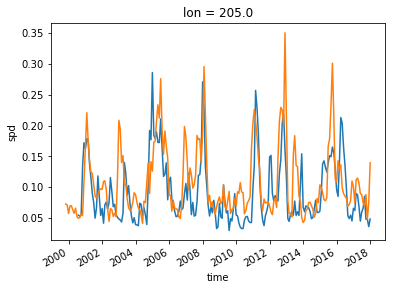

In [133]:
#plot the lag correlation 9 months for 5 deg = 111km*sin(55deglat)/9mon = 10km/month
ds_subset.spd.sel(lon=210,lat=slice(56.4,54.4)).mean('lat').shift(time=9).plot()
ds_subset.spd.sel(lon=205,lat=slice(55,53)).mean('lat').plot()


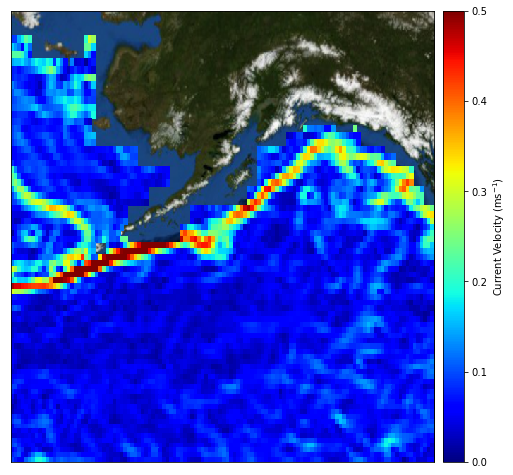

In [7]:
fig = plt.figure(figsize=(11.7,8.3))
ds_subset = ds_all.sel(lon=slice(180,225),lat=slice(65,40))
ds_subset.coords['lon'] = (ds_subset.coords['lon'] + 180) % 360 - 180
m = Basemap(projection='merc', lat_0 = 50, lon_0 = -175,    resolution = 'l', area_thresh = 0.1,
            llcrnrlon=-175, llcrnrlat=40,urcrnrlon=-135, urcrnrlat=65)
m.bluemarble()
#    m.fillcontinents(color='grey',lake_color='white')
lon_grid, lat_grid = np.meshgrid(ds_subset.lon, ds_subset.lat)
x,y = m(lon_grid,lat_grid)
cs = m.pcolormesh(x,y, ds_subset.spd[120,:,:], cmap='jet', vmin = 0, vmax = .5)
m.colorbar(label='Current Velocity (ms$^{-1}$)')
fig.savefig('F:/data/NASA_biophysical/telecon_figs/current_speed_image_2003.png', dpi=100)


NameError: name 'fig' is not defined

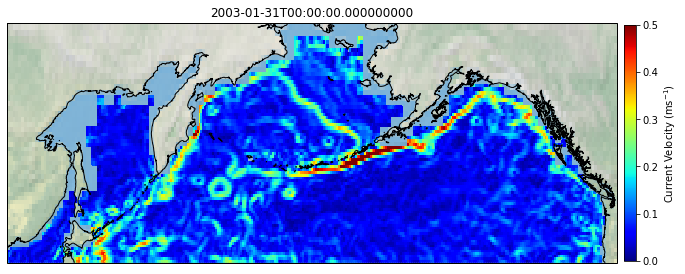

In [54]:
ds_subset = ds_all.sel(lon=slice(120,250),lat=slice(65,40))
ds_subset.coords['lon'] = (ds_subset.coords['lon'] + 180) % 360 - 180
plt.figure(figsize=(13,6.2))
ax = plt.subplot(111, projection=ccrs.Mercator(central_longitude=180,min_latitude=40, max_latitude=65))
ax.background_img(name='ne_shaded', resolution='low')
#ax.background_img(name='BM', resolution='high')
ax.set_extent([130,-122,40,65])
mm = ax.pcolormesh(ds_subset.lon,ds_subset.lat,ds_subset.spd[120,:,:],vmin=0, vmax=.5, transform=ccrs.PlateCarree(),cmap='jet' )
ax.coastlines(resolution='10m');
plt.title(str(ds_subset.time[120].data))
plt.colorbar(mm,ax=ax,shrink=.7,pad=.01,label='Current Velocity (ms$^{-1}$)')
fig.savefig('F:/data/NASA_biophysical/telecon_figs/map_NPac_day20030131.png', dpi=100)


C:\Users\gentemann\Miniconda3\envs\satenv\lib\site-packages\xarray\core\nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


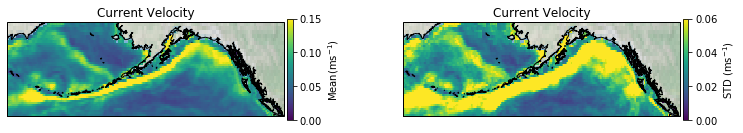

In [55]:
#plot mean and std
ds_subset = ds_all.sel(lon=slice(165,240),lat=slice(62,40))
plt.subplots(1,1,figsize=(13,6.2))
#fig, axarr = plt.subplots(1,1,figsize=(12,3.5))
gs1 = gridspec.GridSpec(1, 2)
ax = plt.subplot(gs1[0],projection=ccrs.Mercator(central_longitude=180,min_latitude=48, max_latitude=62))
ax.background_img(name='ne_shaded', resolution='low')
#ax.background_img(name='BM', resolution='high')
ax.set_extent([165,-122,40,62])
mm = ax.pcolormesh(ds_subset.lon,ds_subset.lat,ds_subset.spd.mean('time'),vmin=0, vmax=.15, transform=ccrs.PlateCarree(),cmap='viridis' )
ax.coastlines(resolution='10m');
plt.title('Current Velocity')
plt.colorbar(mm,ax=ax,shrink=.3,pad=.01,label='Mean(ms$^{-1}$)')

ax = plt.subplot(gs1[1],projection=ccrs.Mercator(central_longitude=180,min_latitude=48, max_latitude=62))
ax.background_img(name='ne_shaded', resolution='low')
#ax.background_img(name='BM', resolution='high')
ax.set_extent([165,-122,40,62])
mm = ax.pcolormesh(ds_subset.lon,ds_subset.lat,ds_subset.spd.std('time'),vmin=0, vmax=.06, transform=ccrs.PlateCarree(),cmap='viridis' )
ax.coastlines(resolution='10m');
plt.title('Current Velocity')
plt.colorbar(mm,ax=ax,shrink=.3,pad=.01,label='STD (ms$^{-1}$)')

#,projection=ccrs.PlateCarree(central_longitude=icenter))
#ax.pcolormesh(ds_subset.lon,ds_subset.lat,ds_subset.spd.mean('time'),vmin=0,vmax=.2)
#plt.plot(ds_subset.lon,ds_subset.lat[curr_max_location],'r',markersize=2)
#ax = plt.subplot(gs1[1])
#ax.pcolormesh(ds_subset.lon,ds_subset.lat,ds_subset.spd.std('time'),vmin=0,vmax=.05)
#plt.plot(ds_subset.lon,ds_subset.lat[curr_max_location],'r',markersize=2)
#plt.plot(ds_subset.lon,ds_subset.lat[curr_max_location-2],'k',markersize=2)
#plt.plot(ds_subset.lon,ds_subset.lat[lower_boundary_index+1],'k',markersize=2)
plt.savefig('F:/data/NASA_biophysical/telecon_figs/mean_std_current_speed.png', dpi=100)


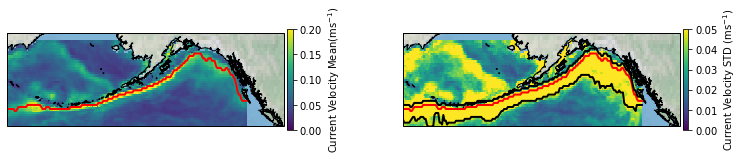

In [56]:
ds_subset = ds_all.sel(lon=slice(165,228),lat=slice(61,48))
#ds_subset.coords['lon'] = (ds_subset.coords['lon'] + 180) % 360 - 180
#ds_subset = ds_subset.sortby(ds_subset.lon)
curr_mean = ds_subset.spd.mean('time')
curr_mean2=curr_mean.where((curr_mean.lon<180) & (curr_mean.lat<53) | (curr_mean.lon>180) & (curr_mean.lat<62))
#i don't understand why but the where above which is just to mask out the arctic ocean area for some
#reason sets the 180 longitude to zero so I reset it to the values manually
curr_mean2[:,45]=curr_mean[:,45]
curr_max = curr_mean2.max('lat')
curr_max_location = np.argmax(curr_mean2,0)
curr_std = ds_subset.spd.std('time')
cmask = curr_std.where(curr_std>=0.048)
[lon2d,lat2d]=np.meshgrid(cmask.lon,cmask.lat)
lat2dm = np.where(np.isnan(cmask), lat2d*np.nan,lat2d)
lower_boundary = np.nanmin(lat2dm,0)
lower_boundary_index = np.nanargmin(lat2dm,0)
plt.subplots(1,1,figsize=(13,6.2))
#fig, axarr = plt.subplots(1,1,figsize=(12,3.5))
gs1 = gridspec.GridSpec(1, 2)
ax = plt.subplot(gs1[0],projection=ccrs.Mercator(central_longitude=180,min_latitude=48, max_latitude=62))
ax.background_img(name='ne_shaded', resolution='low')
#ax.background_img(name='BM', resolution='high')
ax.set_extent([165,-122,48,62])
mm = ax.pcolormesh(ds_subset.lon,ds_subset.lat,ds_subset.spd.mean('time'),vmin=0, vmax=.2, transform=ccrs.PlateCarree(),cmap='viridis' )
ax.plot(ds_subset.lon,ds_subset.lat[curr_max_location],'r',markersize=2,linewidth=2, transform=ccrs.PlateCarree())
ax.coastlines(resolution='10m');
#plt.title(str(ds_subset.time[120].data))
plt.colorbar(mm,ax=ax,shrink=.3,pad=.01,label='Current Velocity Mean(ms$^{-1}$)')

ax = plt.subplot(gs1[1],projection=ccrs.Mercator(central_longitude=180,min_latitude=48, max_latitude=62))
ax.background_img(name='ne_shaded', resolution='low')
#ax.background_img(name='BM', resolution='high')
ax.set_extent([165,-122,48,62])
mm = ax.pcolormesh(ds_subset.lon,ds_subset.lat,ds_subset.spd.std('time'),vmin=0, vmax=.05, transform=ccrs.PlateCarree(),cmap='viridis' )
ax.plot(ds_subset.lon,ds_subset.lat[curr_max_location],'r',markersize=2,linewidth=2, transform=ccrs.PlateCarree())
ax.plot(ds_subset.lon,ds_subset.lat[curr_max_location-2],'k',markersize=2,linewidth=2, transform=ccrs.PlateCarree())
ax.plot(ds_subset.lon,ds_subset.lat[lower_boundary_index],'k',markersize=2,linewidth=2, transform=ccrs.PlateCarree())
ax.coastlines(resolution='10m');
#plt.title(str(ds_subset.time[120].data))
plt.colorbar(mm,ax=ax,shrink=.3,pad=.01,label='Current Velocity STD (ms$^{-1}$)')
plt.savefig('F:/data/NASA_biophysical/telecon_figs/mean_std_current_speed_mask2.png', dpi=100)




In [57]:
#output the mean current and envelope
lbi = xr.DataArray(lower_boundary_index,name='lbi',coords={'lon':ds_subset.lon},dims=('lon'))
mean_lat = xr.DataArray(ds_subset.lat[curr_max_location].data,coords={'lon':ds_subset.lon},dims=('lon'))
clim_min_lat = xr.DataArray(ds_subset.lat[lbi].data,coords={'lon':ds_subset.lon},dims=('lon'))
clim_max_lat = xr.DataArray(ds_subset.lat[curr_max_location-2].data,coords={'lon':ds_subset.lon},dims=('lon'))
ds_mean = xr.Dataset({'mean_lat':mean_lat,'clim_min_lat':clim_min_lat,'clim_max_lat':clim_max_lat})
ds_mean.to_netcdf('F:/data/NASA_biophysical/Alaska_climatology_stream_location.nc')


In [58]:
print(ds_mean.mean_lat[10])
print(ds_subset.lat[curr_max_location[10]])

<xarray.DataArray 'mean_lat' ()>
array(51.333333)
Coordinates:
    lon      float64 168.3
<xarray.DataArray 'lat' ()>
array(51.333333)
Coordinates:
    lat      float64 51.33
    lon      float64 168.3


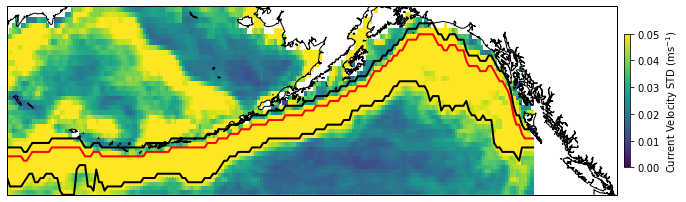

In [59]:
ds_mean=xr.open_dataset('F:/data/NASA_biophysical/Alaska_climatology_stream_location.nc')
ds_subset = ds_all.sel(lon=slice(165,228),lat=slice(61,48))
#ds_subset.coords['lon'] = (ds_subset.coords['lon'] + 180) % 360 - 180
#ds_subset = ds_subset.sortby(ds_subset.lon)
plt.subplots(1,1,figsize=(13,8.2))
#fig, axarr = plt.subplots(1,1,figsize=(12,3.5))
gs1 = gridspec.GridSpec(1, 1)
ax = plt.subplot(gs1[0],projection=ccrs.Mercator(central_longitude=180,min_latitude=48, max_latitude=61))
#ax.background_img(name='ne_shaded', resolution='low')
#ax.background_img(name='BM', resolution='high')
ax.set_extent([165,-122,48,61])
mm = ax.pcolormesh(ds_subset.lon,ds_subset.lat,ds_subset.spd.std('time'),vmin=0, vmax=.05, transform=ccrs.PlateCarree(),cmap='viridis' )
ax.plot(ds_mean.lon,ds_mean.mean_lat,'r',markersize=2,linewidth=2, transform=ccrs.PlateCarree())
ax.plot(ds_mean.lon,ds_mean.clim_min_lat,'k',markersize=2,linewidth=2, transform=ccrs.PlateCarree())
ax.plot(ds_mean.lon,ds_mean.clim_max_lat,'k',markersize=2,linewidth=2, transform=ccrs.PlateCarree())
ax.coastlines(resolution='10m');
#plt.title(str(ds_subset.time[120].data))
plt.colorbar(mm,ax=ax,shrink=.3,pad=.01,label='Current Velocity STD (ms$^{-1}$)')
#plt.savefig('F:/data/NASA_biophysical/telecon_figs/mean_std_current_speed_mask2.png', dpi=100)

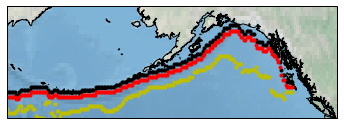

In [60]:
ds_mean=xr.open_dataset('F:/data/NASA_biophysical/telecon_figs/Alasak_climatology_stream_location.nc')
ds_mean.coords['lon'] = (ds_mean.coords['lon'] + 180) % 360 - 180
plt.subplots(1,1,figsize=(13,6.2))
gs1 = gridspec.GridSpec(1, 2)
ax = plt.subplot(gs1[0],projection=ccrs.Mercator(central_longitude=180,min_latitude=48, max_latitude=62))
ax.background_img(name='ne_shaded', resolution='low')
ax.set_extent([165,-122,48,62])
ax.coastlines(resolution='10m');
ax.plot(ds_mean.lon,ds_mean.clim_max_lat,'k.',lw=10, transform=ccrs.PlateCarree())
ax.plot(ds_mean.lon,ds_mean.mean_lat,'r.',lw=10, transform=ccrs.PlateCarree())
ax.plot(ds_mean.lon,ds_mean.clim_min_lat,'y.',lw=10, transform=ccrs.PlateCarree())


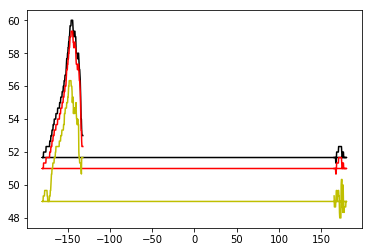

In [61]:
plt.plot(ds_mean.lon,ds_mean.clim_max_lat,'k')
plt.plot(ds_mean.lon,ds_mean.mean_lat,'r')
plt.plot(ds_mean.lon,ds_mean.clim_min_lat,'y')

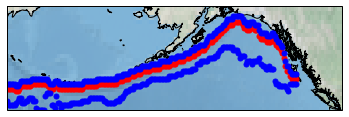

In [62]:
#ds_subset = ds_all.sel(lon=slice(165,228),lat=slice(62,48))
#ds_subset.coords['lon'] = (ds_subset.coords['lon'] + 180) % 360 - 180
#ds_subset = ds_subset.sortby(ds_subset.lon)
gs1 = gridspec.GridSpec(1, 1)
ax = plt.subplot(gs1[0],projection=ccrs.Mercator(central_longitude=180,min_latitude=48, max_latitude=61))
ax.background_img(name='ne_shaded', resolution='low')
ax.coastlines('10m')
ax.set_extent([165,-122,48,61])
#xlon=ds_subset.lon.copy(deep=True); xlon[xlon>180]-=360
#mm = ax.pcolormesh(ds_subset.lon,ds_subset.lat,ds_subset.spd.mean('time'),vmin=0, vmax=.2, transform=ccrs.PlateCarree(),cmap='viridis' )
ax.plot(ds_mean.lon,ds_mean.mean_lat,'r.',linewidth=20,markersize=10, transform=ccrs.PlateCarree())
ax.plot(ds_mean.lon,ds_mean.clim_min_lat,'b.',linewidth=10,markersize=10, transform=ccrs.PlateCarree())
ax.plot(ds_mean.lon,ds_mean.clim_max_lat,'b.',linewidth=10,markersize=10, transform=ccrs.PlateCarree())


In [ ]:
ds_mean

In [63]:
#create a mask usin the upper and lower limits
ds_subset['mask_alaskan_stream']=ds_subset['spd'].copy(deep=True)*np.nan
print(ds_subset.mask_alaskan_stream.shape)
for i in range(0,ds_subset.lon.size):
    l1=lower_boundary_index[i].astype(int)
    l2=curr_max_location[i].astype(int).data-2
    #print(l1,l2)
    ds_subset['mask_alaskan_stream'][:,0:l2+1,i]=1
    ds_subset['mask_alaskan_stream'][:,l1:,i]=1
#try to find current location in more robust fashion
#first mask the data so only alaska stream included
#ONLY data from time 81:300 good, rest land mask has masked stream
ds_masked = ds_subset.where(np.isnan(ds_subset.mask_alaskan_stream))  #this will mask out all data 
ds_masked = ds_masked.where(ds_masked.spd>.1)  #this will mask out all data 
ds_masked = ds_masked.fillna(0)  #problem for early data where over land masking produces lots of missing data
curr_max = ds_masked.spd.max('lat')
curr_max_location_time = np.nanargmax(ds_masked.spd,1)  #find the time of the max
#put into dataarray and interpolate over values when no data
tem = xr.DataArray(curr_max_location_time,coords={'time': ds_subset.time,'lon':ds_subset.lon}, dims=('time', 'lon'))        
tem = tem.where(tem>1,np.nan)
tem = tem.interpolate_na(dim='lon')
tem = tem.ffill(dim='lon')
tem = tem.bfill(dim='lon')
curr_max_location_time=tem.data.astype('int')
#done fixing current location

#curr_max_location = np.nanargmax(ds_masked.spd,0)

print(curr_max_location_time.shape)  
print(ds_subset.lat.size)
print(curr_max_location.shape)

(300, 40, 190)
(300, 190)
40
(190,)


In [65]:
ds_subset['spd_clim']=ds_subset.spd.mean('time')

C:\Users\gentemann\Miniconda3\envs\satenv\lib\site-packages\xarray\core\nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [66]:
dist_from_clim = np.zeros((300,ds_subset.lon.size))
clim_lat = np.zeros((300,ds_subset.lon.size))
lat = np.zeros((300,ds_subset.lon.size))
spd = np.zeros((300,ds_subset.lon.size))
clim_spd = np.zeros((300,ds_subset.lon.size))
for t in range(0,300):
    for i in range(0,ds_subset.lon.size):
        s = np.sign(ds_subset.lat[curr_max_location[i]].data-ds_subset.lat[curr_max_location_time[t,i]].data)
        coords_1 = (ds_subset.lat[curr_max_location[i]],ds_subset.lon[i])  
        coords_2 = (ds_subset.lat[curr_max_location_time[t,i]],ds_subset.lon[i])  
        dist_from_clim[t,i] = s*geopy.distance.geodesic(coords_1, coords_2).km  #distance in km  
        clim_lat[t,i] = ds_subset.lat[curr_max_location[i]]    #distance in km  
        lat[t,i] = ds_subset.lat[curr_max_location_time[t,i]]  
        spd[t,i] = ds_subset.spd[t,curr_max_location_time[t,i],i]  
        clim_spd[t,i] = ds_subset.spd_clim[curr_max_location_time[t,i],i]    #distance in km  
ds_AS_current_var = xr.DataArray(dist_from_clim,name='dist_to_clim',coords={'time': ds_subset.time,'lon':ds_subset.lon}, dims=('time', 'lon'))        
ds_AS_current_lat = xr.DataArray(lat,name='curr_lat',coords={'time': ds_subset.time,'lon':ds_subset.lon}, dims=('time', 'lon'))        
ds_AS_current_lat_clim = xr.DataArray(clim_lat,name='clim_lat',coords={'time': ds_subset.time,'lon':ds_subset.lon}, dims=('time', 'lon'))        
ds_AS_current_spd = xr.DataArray(spd,name='spd',coords={'time': ds_subset.time,'lon':ds_subset.lon}, dims=('time', 'lon'))        
ds_AS_current_spd_clim = xr.DataArray(clim_spd,name='clim_spd',coords={'time': ds_subset.time,'lon':ds_subset.lon}, dims=('time', 'lon'))        
ds_curr = xr.Dataset({'spd':ds_AS_current_spd,'spd_clim':ds_AS_current_spd_clim,'dist_to_clim':ds_AS_current_var,'curr_lat':ds_AS_current_lat,'curr_clim_lat':ds_AS_current_lat_clim})
ds_curr.to_netcdf('F:/data/NASA_biophysical/Alaska_stream_location.nc')


In [15]:
ds_curr

<xarray.Dataset>
Dimensions:        (lon: 190, time: 300)
Coordinates:
  * time           (time) datetime64[ns] 1993-01-31 1993-02-28 ... 2017-12-31
  * lon            (lon) float64 165.0 165.3 165.7 166.0 ... 227.3 227.7 228.0
Data variables:
    spd            (time, lon) float64 0.1883 0.1722 0.1931 ... 0.03117 nan nan
    spd_clim       (time, lon) float64 0.1164 0.1128 0.1156 ... 0.03268 nan nan
    dist_to_clim   (time, lon) float64 111.3 185.4 185.4 148.3 ... 0.0 0.0 0.0
    curr_lat       (time, lon) float64 51.0 50.33 50.33 ... 53.33 53.33 53.33
    curr_clim_lat  (time, lon) float64 52.0 52.0 52.0 52.0 ... 53.33 53.33 53.33

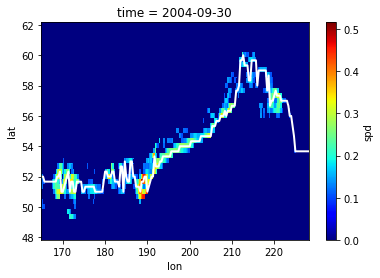

In [33]:
i=140
ds_masked.spd[i,:,:].plot(cmap='jet')
plt.plot(ds_curr.lon,ds_curr.curr_lat[i,:],'w',lw=2)
#tem=ds_curr.curr_lat.copy(deep=True)
#tem = tem.where(tem<60,np.nan)
#tem = tem.interpolate_na(dim='lon')
#plt.plot(ds_curr.lon,tem[i,:],color='w',lw=4)

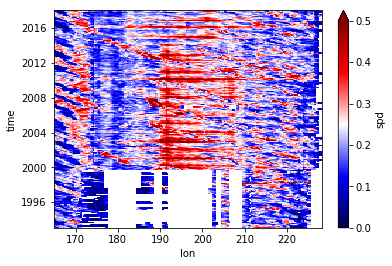

In [17]:
plt.clf()
ds_curr.spd.plot(vmin=0,vmax=0.5,cmap='seismic')
plt.savefig('F:/data/NASA_biophysical/telecon_figs/max_curr_AS_hovmuller2.png', dpi=100)


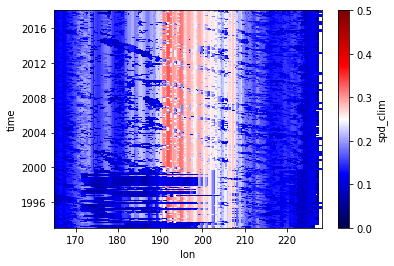

In [18]:
plt.clf()
ds_curr.spd_clim.plot(vmin=0,vmax=0.5,cmap='seismic')
plt.savefig('F:/data/NASA_biophysical/telecon_figs/max_curr_clim_AS_hovmuller2.png', dpi=100)


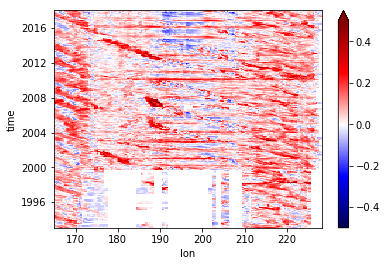

In [19]:
plt.clf()
(ds_curr.spd-ds_curr.spd_clim).plot(vmin=-.5,vmax=0.5,cmap='seismic')
plt.savefig('F:/data/NASA_biophysical/telecon_figs/max_curr_anom_AS_hovmuller2.png', dpi=100)


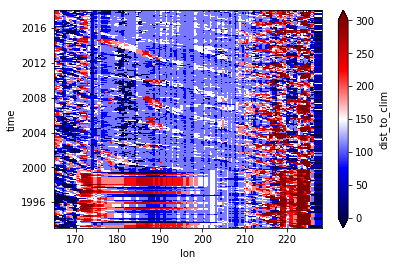

In [38]:
plt.clf()
(ds_curr.dist_to_clim).plot(vmin=0,vmax=300,cmap='seismic')
plt.savefig('F:/data/NASA_biophysical/telecon_figs/max_curr_dist_AS_hovmuller2.png', dpi=100)


In [107]:
#try to create a animation

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

y, x = np.meshgrid(np.linspace(-10, 10,100), np.linspace(-10, 10,100))

z = np.sin(x)*np.sin(x)+np.sin(y)*np.sin(y)

v = np.linspace(-10, 10,100)
t = np.sin(v)*np.sin(v)
tt = np.cos(v)*np.cos(v)
###########

fig = plt.figure(figsize=(16, 8),facecolor='white')
gs = gridspec.GridSpec(5, 2)
ax1 = plt.subplot(gs[0,0])

line, = ax1.plot([],[],'b-.',linewidth=2)
ax1.set_xlim(-10,10)
ax1.set_ylim(0,1)
ax1.set_xlabel('time')
ax1.set_ylabel('amplitude')
ax1.set_title('Oscillationsssss')
time_text = ax1.text(0.02, 0.95, '', transform=ax1.transAxes)

#############################
ax2 = plt.subplot(gs[1:3,0])
quad1 = ax2.pcolormesh(x,y,z,shading='gouraud')
ax2.set_xlabel('time')
ax2.set_ylabel('amplitude')
cb2 = fig.colorbar(quad1,ax=ax2)

#########################
ax3 = plt.subplot(gs[3:,0])
quad2 = ax3.pcolormesh(x, y, z,shading='gouraud')
ax3.set_xlabel('time')
ax3.set_ylabel('amplitude')
cb3 = fig.colorbar(quad2,ax=ax3)

############################
ax4 = plt.subplot(gs[:,1])
line2, = ax4.plot(v,tt,'b',linewidth=2)
ax4.set_xlim(-10,10)
ax4.set_ylim(0,1)

def init():
    line.set_data([],[])
    line2.set_data([],[])
    quad1.set_array([])
    return line,line2,quad1

def animate(iter):
    t = np.sin(2*v-iter/(2*np.pi))*np.sin(2*v-iter/(2*np.pi))
    tt = np.cos(2*v-iter/(2*np.pi))*np.cos(2*v-iter/(2*np.pi))
    z = np.sin(x-iter/(2*np.pi))*np.sin(x-iter/(2*np.pi))+np.sin(y)*np.sin(y)
    line.set_data(v,t)
    quad1.set_array(z.ravel())
    line2.set_data(v,tt)
    return line,line2,quad1

gs.tight_layout(fig)

anim = animation.FuncAnimation(fig,animate,frames=100,interval=50,blit=False,repeat=False)
plt.show()

print 'Finished!!'

TypeError: unhashable type: 'numpy.ndarray'

<Figure size 432x288 with 0 Axes>

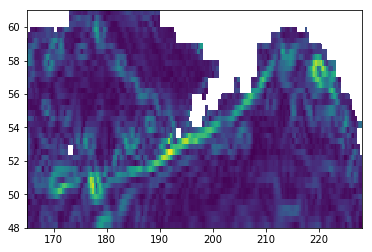

In [105]:
plt.pcolormesh(ds_subset.lon,ds_subset.lat,ds_subset.spd[100,:,:])

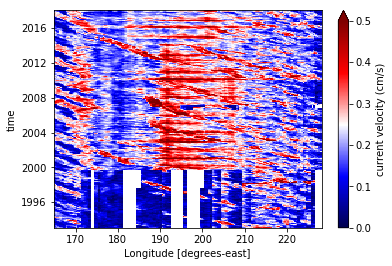

In [100]:
plt.clf()
ds_masked = ds_subset.where(np.isnan(ds_subset.mask_alaskan_stream))  #this will mask out all data 
curr_max = ds_masked.spd.max('lat')
curr_max.attrs={'standard_name':'current velocity (cm/s)'}
curr_max.plot(vmin=0,vmax=0.5,cmap='seismic')
plt.savefig('F:/data/NASA_biophysical/telecon_figs/max_curr_AS_hovmuller2.png', dpi=100)


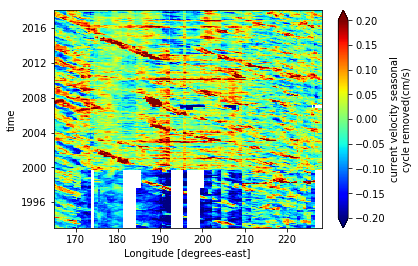

In [101]:
#remove annual cycle
climatology = curr_max.groupby('time.month').mean('time')
anomalies = curr_max.groupby('time.month') - climatology
anomalies.attrs={'standard_name':'current velocity seasonal cycle removed(cm/s)'}
anomalies.plot(vmin=-0.2,vmax=0.2,cmap='jet')
plt.savefig('F:/data/NASA_biophysical/telecon_figs/max2_curr_AS_hovmuller_seasonal_cycle_removed.png', dpi=100)


In [15]:
curr_max

<xarray.DataArray 'spd' (time: 300, lon: 190)>
array([[0.188275, 0.172187, 0.193076, ...,      nan,      nan,      nan],
       [0.180409, 0.160565, 0.169356, ...,      nan,      nan,      nan],
       [0.123543, 0.138917, 0.19884 , ...,      nan,      nan,      nan],
       ...,
       [0.244893, 0.27341 , 0.263483, ..., 0.073312, 0.069291, 0.073067],
       [0.175291, 0.26332 , 0.243451, ..., 0.126394, 0.108209, 0.111691],
       [0.149861, 0.21119 , 0.187377, ..., 0.089681, 0.0918  , 0.094744]])
Coordinates:
  * lon      (lon) float64 165.0 165.3 165.7 166.0 ... 227.0 227.3 227.7 228.0
  * time     (time) datetime64[ns] 1993-01-31 1993-02-28 ... 2017-12-31
Attributes:
    standard_name:  current velocity (cm/s)

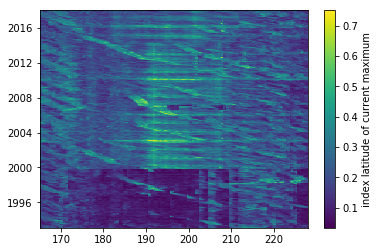

In [16]:
ds_masked = ds_subset.where(np.isnan(ds_subset.mask_alaskan_stream))  #this will mask out all data 
ds_filled = ds_subset.fillna(0)  #problem for early data where over land masking produces lots of missing data
curr_max = ds_filled.spd.max('lat')
curr_max_location_time = np.nanargmax(ds_filled.spd,1)  #find the time of the max
plt.pcolormesh(ds_filled.lon,ds_filled.time,curr_max) #,vmin=5,vmax=33)
#plt.pcolormesh(ds_filled.lon,ds_filled.time,curr_max_location,vmin=5,vmax=33)
plt.colorbar(label='index latitude of current maximum')
plt.savefig('F:/data/NASA_biophysical/telecon_figs/max2_curr_latitude_index.png', dpi=100)

#find distance from mean location to look at variability

In [17]:
curr_max_location.shape
print(curr_max_location.shape)
print(curr_max_location_time.shape)
ds_filled

(190,)
(300, 190)


<xarray.Dataset>
Dimensions:              (lat: 40, lon: 190, time: 300)
Coordinates:
  * lat                  (lat) float64 61.0 60.67 60.33 ... 48.67 48.33 48.0
  * lon                  (lon) float64 165.0 165.3 165.7 ... 227.3 227.7 228.0
  * time                 (time) datetime64[ns] 1993-01-31 ... 2017-12-31
Data variables:
    u                    (time, lat, lon) float64 0.0 0.0 ... 0.03881 0.04617
    v                    (time, lat, lon) float64 0.0 0.0 ... 0.006725 0.003773
    spd                  (time, lat, lon) float64 0.0 0.0 ... 0.03939 0.04632
    dir                  (time, lat, lon) float64 0.0 0.0 0.0 ... 9.831 4.671
    mask_alaskan_stream  (time, lat, lon) float64 1.0 1.0 1.0 ... 1.0 1.0 1.0
Attributes:
    VARIABLE:       Ocean Surface Currents
    DATATYPE:       1/72 YEAR Interval
    DATASUBTYPE:    unfiltered
    GEORANGE:       20 to 420 -80 to 80
    PERIOD:         Jan.01,1993 to Dec.26,1993
    year:           1993
    description:    OSCAR Third Degree S

In [28]:
#caluclate distance from mean location of AS at each longitude and time
curr_var = np.zeros((300,ds_subset.lon.size))
curr_lat = np.zeros((300,ds_subset.lon.size))
curr_clim_lat = np.zeros((300,ds_subset.lon.size))
for t in range(0,300):
    for i in range(0,ds_subset.lon.size):
        s = np.sign(ds_subset.lat[curr_max_location[i]].data-ds_subset.lat[curr_max_location_time[t,i]].data)
        coords_1 = (ds_subset.lat[curr_max_location[i]],ds_subset.lon[i])  
        coords_2 = (ds_subset.lat[curr_max_location_time[t,i]],ds_subset.lon[i])  
        curr_var[t,i] = s*geopy.distance.geodesic(coords_1, coords_2).km  #distance in km  
        curr_clim_lat[t,i] = ds_subset.lat[curr_max_location[i]]    #distance in km  
        curr_lat[t,i] = ds_subset.lat[curr_max_location_time[t,i]]  
ds_tem = xr.DataArray(curr_var,coords={'time': ds_subset.time,'lon':ds_subset.lon}, dims=('time', 'lon'))        

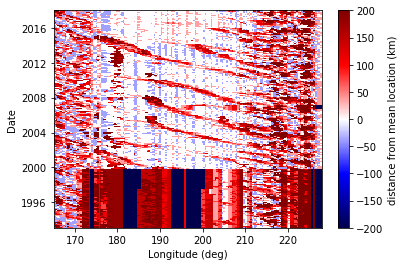

In [93]:
plt.pcolormesh(ds_subset.lon,ds_subset.time,curr_var,vmin=-200,vmax=200,cmap='seismic')
plt.xlabel('Longitude (deg)')
plt.ylabel('Date')
plt.colorbar(label='distance from mean location (km)')
plt.savefig('F:/data/NASA_biophysical/telecon_figs/max2_curr_distance_from_mean.png', dpi=100)


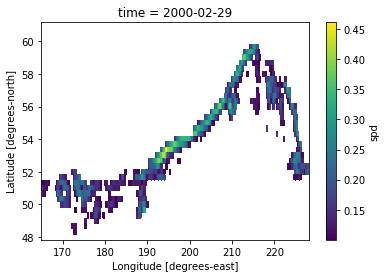

In [108]:
ds_masked = ds_subset.where(np.isnan(ds_subset.mask_alaskan_stream))  #this will mask out all data 
ds_masked = ds_masked.where(ds_masked.spd>.1)  #this will mask out all data 
ds_masked.spd[85,:,:].plot()


AttributeError: 'Dataset' object has no attribute 'mask_alaskan_stream'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [172]:
ds_masked = ds_subset.where(np.isnan(ds_subset.mask_alaskan_stream))  #this will mask out all data 
ds_masked = ds_masked.where(ds_masked.spd>.1)  #this will mask out all data 
ds_masked = ds_masked.fillna(0)  #problem for early data where over land masking produces lots of missing data
curr_max = ds_masked.spd.max('lat')
curr_max_location_time = np.nanargmax(ds_masked.spd,1)  #find the time of the max
#put into dataarray and interpolate over values when no data
tem = xr.DataArray(curr_max_location_time,coords={'time': ds_subset.time,'lon':ds_subset.lon}, dims=('time', 'lon'))        
tem = tem.where(tem>1,np.nan)
tem = tem.interpolate_na(dim='lon')
tem = tem.ffill(dim='lon')
curr_max_location_time=tem.data


In [173]:
print(ds_masked.spd.shape)
print(ds_masked.lon.shape)
print(curr_max_location_time[0,:])

(300, 40, 190)
(190,)
[30.         32.         32.         31.         31.         33.
 32.         32.         29.         29.         30.         31.
 31.         28.         29.         28.         27.         28.
 29.         29.         38.         38.         38.         37.71428571
 37.42857143 37.14285714 36.85714286 36.57142857 36.28571429 36.
 36.         36.         35.875      35.75       35.625      35.5
 35.375      35.25       35.125      35.         35.         35.
 35.         35.         35.         35.         35.         35.
 35.         35.         35.         35.         35.         35.
 35.         35.         35.         35.         35.         35.
 35.         35.         35.         35.         35.         35.
 35.         33.         33.         32.         34.         34.
 33.         33.         32.         31.         30.         29.
 29.         29.         29.         29.         29.         28.72727273
 28.45454545 28.18181818 27.90909091 27.63636364 27

In [164]:
tem = xr.DataArray(curr_max_location_time,coords={'time': ds_subset.time,'lon':ds_subset.lon}, dims=('time', 'lon'))        
#tem = curr_max_location
tem = tem.where(tem>1,np.nan)
tem = tem.interpolate_na(dim='lon')
print(curr_max_location_time[85,:])
print(tem[85,:])
curr_max_location_time=tem.data
print(curr_max_location_time[85,:])


[29 30 30 29 29 29  0  0  0  0 30 31 31 32 32 32 29 30 30 30 31  0 27 27
 29 29 31 31 31 29 29 31 31 31 31 30 30 30 35 35 34 34 30  0 35 29 30 30
 30 30 33 29 29 29 29 29 29 28 28 27 27  0 29 29  0 29 28 28 28 34 28 28
 28 34 33 27 27 27 25 25 25 25 25 25 25 24 24 24 23 23 23 23 23 23 22 22
 22 22 21 21 21 21 21 21 21 21 21 21 20 20 20 19 19 19 19 19 18 18 18 18
 17 17 16 16 16 16 15 15 15 14 14 13 12 15 15 15 10 10  9  9  9  8  7  6
  6  6  6  5  5  5  5  4  4  4  6 10  0  9  9 10 11 11 11 10 10 14 13 13
 12 15 14 14 11 11 12 12 13 15 15 25 25 24 24 24 22 26 26 27 27 27]
<xarray.DataArray (lon: 190)>
array([29. , 30. , 30. , 29. , 29. , 29. , 29.2, 29.4, 29.6, 29.8, 30. , 31. ,
       31. , 32. , 32. , 32. , 29. , 30. , 30. , 30. , 31. , 29. , 27. , 27. ,
       29. , 29. , 31. , 31. , 31. , 29. , 29. , 31. , 31. , 31. , 31. , 30. ,
       30. , 30. , 35. , 35. , 34. , 34. , 30. , 32.5, 35. , 29. , 30. , 30. ,
       30. , 30. , 33. , 29. , 29. , 29. , 29. , 29. , 29. , 28. , 28. , 27

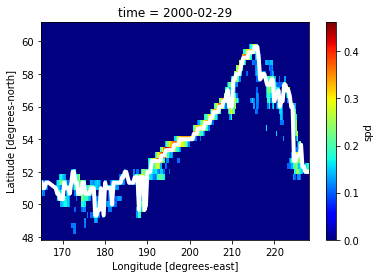

In [155]:
tem

<xarray.DataArray 'curr_lat' (time: 300, lon: 190)>
array([[51.      , 50.333333, 50.333333, ...,       nan,       nan,       nan],
       [51.      , 50.      , 49.333333, ...,       nan,       nan,       nan],
       [49.666667, 49.      , 49.      , ...,       nan,       nan,       nan],
       ...,
       [49.666667, 49.666667, 49.333333, ...,       nan,       nan,       nan],
       [49.666667, 49.      , 49.      , ..., 52.666667, 52.333333, 52.333333],
       [49.666667, 49.      , 49.      , ...,       nan,       nan,       nan]])
Coordinates:
  * time     (time) datetime64[ns] 1993-01-31 1993-02-28 ... 2017-12-31
  * lon      (lon) float64 165.0 165.3 165.7 166.0 ... 227.0 227.3 227.7 228.0

In [137]:
ds_curr2 = ds_curr.copy(deep=True)
ds_curr2 = ds_curr.curr_lat.where(ds_curr.curr_lat==61.0,np.nan)
print(ds_curr2[85,7].data)
print(ds_masked.spd[85,:,7])

61.0
<xarray.DataArray 'spd' (lat: 40)>
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])
Coordinates:
  * lat      (lat) float64 61.0 60.67 60.33 60.0 59.67 ... 49.0 48.67 48.33 48.0
    lon      float64 167.3
    time     datetime64[ns] 2000-02-29


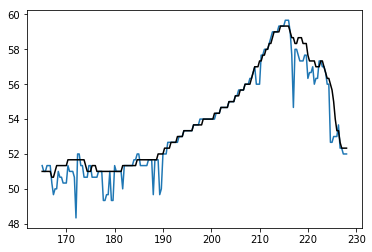

In [98]:
for i in range(85,86):
    plt.plot(ds_curr.lon,ds_curr.curr_lat[i,:])
ax.coastlines
plt.plot(ds_curr.lon,ds_curr.curr_clim_lat[0,:],color='k')


In [ ]:
i=100
np.sign(ds_subset.lat[curr_max_location[i]].data-ds_subset.lat[curr_max_location_time[t,i]].data)

In [ ]:
subset_vel = ds_tem.sel(lon=slice(190,208),time=slice('2000-01-01','2016-12-31'))
subset_vel.plot(vmin=-500,vmax=500,cmap='seismic')

In [ ]:
#look at region and mask out edges so can fit a line better
subset_vel = ds_tem.sel(lon=slice(190,210),time=slice('2002-07-01','2005-01-31'))
subset_vel = subset_vel.where((subset_vel.time<np.datetime64('2003-10')) | (subset_vel.lon<200))
subset_vel = subset_vel.where((subset_vel.time>np.datetime64('2003-07')) | (subset_vel.lon>198))
subset_vel.plot(vmin=-100,vmax=100,cmap='seismic')
plt.plot([210,190],[np.datetime64('2002-07'),np.datetime64('2004-09')],'k')

In [ ]:
svfitx,svfity,svfits,svfitp=np.zeros((5,35)),np.zeros((5,35)),np.zeros(5),np.zeros(5)
ind = subset_vel.where(subset_vel>40, drop=True).squeeze()
xx,yy=[],[]
for i in range(0,ind.shape[0]):
    for j in range(0,ind.shape[1]):
        if np.isnan(ind[i,j]):
            continue
        xx,yy=np.append(xx,ind.lon[j]),np.append(yy,(ind.time[i]-ind.time[0])/np.timedelta64(1, 'D'))
p = np.polyfit(xx,yy,1)
xfit = np.arange(190,225,1) #(0,60,1)
yfit = np.polyval(p,xfit)
tax = (ind.time - ind.time[0])/np.timedelta64(1, 'D')
plt.pcolor(ind.lon,tax,ind)
plt.plot(xfit,yfit,'r')
print(p)
print(xfit[-1],(ind.time[0]+np.timedelta64(int(yfit[-1]),'D')).data)
print('start',((ind.time[0]-np.datetime64('2000-01-01'))/np.timedelta64(1,'D')).data)
svfitx[0,:]=xfit
svfity[0,:]=yfit
svfits[0]=((ind.time[0]-np.datetime64('2000-01-01'))/np.timedelta64(1,'D')).data
svfitp[0]=p[0]

In [ ]:
#look at region and mask out edges so can fit a line better
subset_vel = ds_tem.sel(lon=slice(190,210),time=slice('2003-10-01','2008-01-31'))
subset_vel = subset_vel.where((subset_vel.time<np.datetime64('2006-10')) | (subset_vel.lon<195))
subset_vel = subset_vel.where((subset_vel.time<np.datetime64('2006-07')) | (subset_vel.lon<196))
subset_vel = subset_vel.where((subset_vel.time<np.datetime64('2005-01')) | (subset_vel.lon<207))
subset_vel = subset_vel.where((subset_vel.time<np.datetime64('2005-07')) | (subset_vel.lon<203))
subset_vel = subset_vel.where((subset_vel.time<np.datetime64('2005-03')) | (subset_vel.lon<205))
subset_vel = subset_vel.where((subset_vel.time<np.datetime64('2004-07')) | (subset_vel.lon<209))
subset_vel = subset_vel.where((subset_vel.time>np.datetime64('2005-01')) | (subset_vel.lon>203))
subset_vel.plot(vmin=-100,vmax=100,cmap='seismic')


In [ ]:
ind = subset_vel.where(subset_vel>40, drop=True).squeeze()
xx,yy=[],[]
for i in range(0,ind.shape[0]):
    for j in range(0,ind.shape[1]):
        if np.isnan(ind[i,j]):
            continue
        xx,yy=np.append(xx,ind.lon[j]),np.append(yy,(ind.time[i]-ind.time[0])/np.timedelta64(1, 'D'))
p = np.polyfit(xx,yy,1)
xfit = np.arange(190,225,1) #(0,60,1)
yfit = np.polyval(p,xfit)
tax = (ind.time - ind.time[0])/np.timedelta64(1, 'D')
plt.pcolor(ind.lon,tax,ind)
plt.plot(xfit,yfit,'r')
print(p)
print(xfit[-1],(ind.time[0]+np.timedelta64(int(yfit[-1]),'D')).data)
print('start',((ind.time[0]-np.datetime64('2000-01-01'))/np.timedelta64(1,'D')).data)
svfitx[1,:]=xfit
svfity[1,:]=yfit
svfits[1]=((ind.time[0]-np.datetime64('2000-01-01'))/np.timedelta64(1,'D')).data
svfitp[1]=p[0]

In [ ]:
#look at region and mask out edges so can fit a line better
subset_vel = ds_tem.sel(lon=slice(190,210),time=slice('2006-10-01','2010-01-31'))
subset_vel = subset_vel.where((subset_vel.time<np.datetime64('2009-02')) | (subset_vel.lon<200))
subset_vel = subset_vel.where((subset_vel.time<np.datetime64('2008-01')) | (subset_vel.lon<205))
subset_vel = subset_vel.where((subset_vel.time>np.datetime64('2008-04')) | (subset_vel.lon>200))
subset_vel = subset_vel.where((subset_vel.time>np.datetime64('2007-04')) | (subset_vel.lon>205))
subset_vel = subset_vel.where((subset_vel.time>np.datetime64('2007-03')) | (subset_vel.lon>209))
subset_vel.plot(vmin=-100,vmax=100,cmap='seismic')


In [ ]:
ind = subset_vel.where(subset_vel>40, drop=True).squeeze()
xx,yy=[],[]
for i in range(0,ind.shape[0]):
    for j in range(0,ind.shape[1]):
        if np.isnan(ind[i,j]):
            continue
        xx,yy=np.append(xx,ind.lon[j]),np.append(yy,(ind.time[i]-ind.time[0])/np.timedelta64(1, 'D'))
p = np.polyfit(xx,yy,1)
xfit = np.arange(190,225,1) #(0,60,1)
yfit = np.polyval(p,xfit)
tax = (ind.time - ind.time[0])/np.timedelta64(1, 'D')
plt.pcolor(ind.lon,tax,ind)
plt.plot(xfit,yfit,'r')
print(p)
print(xfit[-1],(ind.time[0]+np.timedelta64(int(yfit[-1]),'D')).data)
print('start',((ind.time[0]-np.datetime64('2000-01-01'))/np.timedelta64(1,'D')).data)
svfitx[2,:]=xfit
svfity[2,:]=yfit
svfits[2]=((ind.time[0]-np.datetime64('2000-01-01'))/np.timedelta64(1,'D')).data
svfitp[2]=p[0]

In [ ]:
#look at region and mask out edges so can fit a line better
subset_vel = ds_tem.sel(lon=slice(190,210),time=slice('2010-01-03','2012-11-01'))
subset_vel = subset_vel.where((subset_vel.time<np.datetime64('2011-10')) | (subset_vel.lon<200))
subset_vel = subset_vel.where((subset_vel.time<np.datetime64('2011-01')) | (subset_vel.lon<207))
subset_vel = subset_vel.where((subset_vel.time>np.datetime64('2010-10')) | (subset_vel.lon>205))
subset_vel.plot(vmin=-100,vmax=100,cmap='seismic')


In [ ]:
ind = subset_vel.where(subset_vel>40, drop=True).squeeze()
xx,yy=[],[]
for i in range(0,ind.shape[0]):
    for j in range(0,ind.shape[1]):
        if np.isnan(ind[i,j]):
            continue
        xx,yy=np.append(xx,ind.lon[j]),np.append(yy,(ind.time[i]-ind.time[0])/np.timedelta64(1, 'D'))
p = np.polyfit(xx,yy,1)
xfit = np.arange(190,225,1) #(0,60,1)
yfit = np.polyval(p,xfit)
tax = (ind.time - ind.time[0])/np.timedelta64(1, 'D')
plt.pcolor(ind.lon,tax,ind)
plt.plot(xfit,yfit,'r')
print(p)
print(xfit[-1],(ind.time[0]+np.timedelta64(int(yfit[-1]),'D')).data)
print('start',((ind.time[0]-np.datetime64('2000-01-01'))/np.timedelta64(1,'D')).data)
svfitx[3,:]=xfit
svfity[3,:]=yfit
svfits[3]=((ind.time[0]-np.datetime64('2000-01-01'))/np.timedelta64(1,'D')).data
svfitp[3]=p[0]

In [ ]:
subset_vel = ds_tem.sel(lon=slice(190,210),time=slice('2011-10-03','2014-07-01'))
subset_vel = subset_vel.where((subset_vel.time<np.datetime64('2014-01')) | (subset_vel.lon<200))
subset_vel = subset_vel.where((subset_vel.time<np.datetime64('2013-07')) | (subset_vel.lon<202))
subset_vel = subset_vel.where((subset_vel.time<np.datetime64('2013-01')) | (subset_vel.lon<204))
subset_vel = subset_vel.where((subset_vel.time>np.datetime64('2012-10')) | (subset_vel.lon>200))
subset_vel.plot(vmin=-100,vmax=100,cmap='seismic')


In [ ]:
ind = subset_vel.where(subset_vel>40, drop=True).squeeze()
xx,yy=[],[]
for i in range(0,ind.shape[0]):
    for j in range(0,ind.shape[1]):
        if np.isnan(ind[i,j]):
            continue
        xx,yy=np.append(xx,ind.lon[j]),np.append(yy,(ind.time[i]-ind.time[0])/np.timedelta64(1, 'D'))
p = np.polyfit(xx,yy,1)
xfit = np.arange(190,225,1) #(0,60,1)
yfit = np.polyval(p,xfit)
tax = (ind.time - ind.time[0])/np.timedelta64(1, 'D')
plt.pcolor(ind.lon,tax,ind)
plt.plot(xfit,yfit,'r')
print(p)
print(xfit[-1],(ind.time[0]+np.timedelta64(int(yfit[-1]),'D')).data)
print('start',((ind.time[0]-np.datetime64('2000-01-01'))/np.timedelta64(1,'D')).data)
svfitx[4,:]=xfit
svfity[4,:]=yfit
svfits[4]=((ind.time[0]-np.datetime64('2000-01-01'))/np.timedelta64(1,'D')).data
svfitp[4]=p[0]

In [ ]:
subset_vel = ds_tem.sel(lon=slice(165,225),time=slice('2000-01-01','2016-12-31'))
tax = (subset_vel.time - subset_vel.time[0])/np.timedelta64(1, 'D')
plt.pcolormesh(subset_vel.lon,tax,subset_vel,vmin=-500,vmax=500,cmap='seismic')
for i in range(0,5):
    plt.plot(svfitx[i,:],svfity[i,:]+svfits[i],'k',label=str(i))
    plt.text(191,svfity[i,0]+svfits[i],str(i))
plt.xlabel('Longitude (deg)')
plt.ylabel('Days from 2000-01-01')
plt.colorbar(label='Distance from mean location (km)')
plt.savefig('F:/data/NASA_biophysical/telecon_figs/eddy_hov.png', dpi=100)
    

In [ ]:
svfitp

In [ ]:
min_lat = np.empty(250)
max_lat = np.empty(250)
#max_lat[185:]=[52.0,52.1,52.1,52.1,54]
for cen_lon in range(165,195):
    fig, axarr = plt.subplots(1,1,figsize=(4,4))
    ds_subset = ds_all.sel(lon=slice(cen_lon,cen_lon),lat=slice(60,50))
    ds_subset.spd[84:,:,:].transpose().plot(vmin=0,vmax=.3)
    fig.savefig('F:/data/NASA_biophysical/telecon_figs/' + 'hov_lon'+str(cen_lon)+'.png', dpi=100)
    fig.clf()


In [ ]:
cen_lon=185
ds_subset = ds_all.sel(lon=slice(cen_lon,cen_lon),lat=slice(60,50))
tem = ds_subset.mean('time').mean('depth').drop('year')
print(tem)
ii = tem.argmax(dim='lat')
ilat = tem.lat[ii.spd].data[0]
print(ilat)

In [ ]:
cen_lon=185
import datetime as dt
svlat=[]
svspd=[]
ilon=195 #for ilon in range(195,285):
cen_lon = ds_all.lon[ilon]
#for this lon find the mean position
ds_subset = ds_all.sel(lon=slice(cen_lon,cen_lon),lat=slice(60,48))
tem = ds_subset.mean('time').mean('depth').drop('year')
ii = tem.argmax(dim='lat')
cen_lat = tem.lat[ii.spd].data[0]
print(cen_lat)
#now look around cen lat for tim variable mean 
ds_subset = ds_all.sel(time=slice(dt.datetime(2000,1,1),dt.datetime(2018,1,1)),lon=slice(cen_lon,cen_lon),lat=slice(cen_lat+2,cen_lat-4))
tem = ds_subset.mean('depth').drop('year')
ii = tem.argmax(dim='lat')
yy = tem.max(dim='lat')
cen_ii_time=ii.spd
cen_lat_time=tem.lat[ii.spd]
cen_lat_spd=yy.spd
print(cen_lat_time.mean())
cen_lat_time.plot()
svlat.append(cen_lat_time)
svspd.append(cen_lat_spd)



In [ ]:
tem

In [ ]:
tem.spd[:,:,0].plot()

In [ ]:
cen_lat_time.plot()

In [ ]:
ds_all.spd[10,0,:,:].plot()
print(ds_all.lon[195])

In [ ]:

ilon,itime=195,180 #for ilon in range(195,285):
cen_lon = ds_all.lon[ilon]
ds_subset = ds_all.sel(lon=slice(cen_lon,cen_lon),lat=slice(60,47.3))
ds_all.spd[itime,0,:,ilon].plot()
ds_subset.spd[itime,0,:,0].plot()
ds_smooth = ds_subset.rolling(time=4).mean()
ds_smooth.spd[itime,0,:,0].plot()  #smooth data
tem = ds_subset.mean('time').mean('depth').drop('year')
ii = tem.argmax(dim='lat')
cen_lat = tem.lat[ii.spd].data[0]
cen_spd = tem.spd[ii.spd].data[0]
plt.plot(cen_lat,cen_spd,'b.')
print(cen_lat,cen_spd)
#now look around cen lat for tim variable mean 
ds_subset = ds_all.sel(time=slice(dt.datetime(2000,1,1),dt.datetime(2018,1,1)),lon=slice(cen_lon,cen_lon),lat=slice(cen_lat+2,cen_lat-4))
tem = ds_subset.mean('depth').drop('year')
ii = tem.argmax(dim='lat')
yy = tem.max(dim='lat')
cen_ii_time=ii.spd
cen_lat_time=tem.lat[ii.spd]
cen_lat_spd=yy.spd
#print(cen_lat_time)
print(cen_lat_time.mean())
#cen_lat_time.plot()
plt.plot(cen_lat_time.mean(),cen_lat_spd.mean(),'r.')

In [ ]:
cen_lat_time[10,0]

In [ ]:
ilon=195
cen_lon = ds_all.lon[ilon]
#for this lon find the mean position
ds_subset = ds_all.sel(lon=slice(cen_lon,cen_lon),lat=slice(60,48))
ds_subset.spd[86,0,:,0].plot()

In [ ]:
ds_subset.spd[0,:]

In [ ]:
fig, axarr = plt.subplots(1,1,figsize=(4,4))
ds_subset = ds_all.sel(lon=slice(180,180),lat=slice(65,45))
ds_subset.spd[:,0,:,:].transpose().plot(vmin=0,vmax=.3)
fig.savefig('F:/data/NASA_biophysical/telecon_figs/' + 'hov_lon180.png', dpi=100)


In [ ]:
fig, axarr = plt.subplots(1,1,figsize=(4,4))
ds_subset = ds_all.sel(lon=slice(190,190),lat=slice(65,45))
ds_subset.spd[:,0,:,:].transpose().plot(vmin=0,vmax=.3)
fig.savefig('F:/data/NASA_biophysical/telecon_figs/' + 'hov_lon190.png', dpi=100)



In [ ]:
fig, axarr = plt.subplots(1,1,figsize=(4,4))
ds_subset = ds_all.sel(lon=slice(200,200),lat=slice(65,45))
ds_subset.spd[:,0,:,:].transpose().plot(vmin=0,vmax=.3)
fig.savefig('F:/data/NASA_biophysical/telecon_figs/' + 'hov_lon200.png', dpi=100)


In [ ]:
fig, axarr = plt.subplots(1,1,figsize=(4,4))
ds_subset = ds_all.sel(lon=slice(210,210),lat=slice(65,45))
ds_subset.spd[:,0,:,:].transpose().plot(vmin=0,vmax=.3)
fig.savefig('F:/data/NASA_biophysical/telecon_figs/' + 'hov_lon210.png', dpi=100)


In [ ]:
fig, axarr = plt.subplots(1,1,figsize=(4,4))
ds_subset = ds_all.sel(lon=slice(180,210),lat=slice(58,47.5))
ds_subset.spd[:,0,:,:].max('lat').transpose().plot(vmin=0,vmax=0.5)
fig.savefig('F:/data/NASA_biophysical/telecon_figs/' + 'max_spd_180_210.png', dpi=100)


In [ ]:
fig, axarr = plt.subplots(1,1,figsize=(4,4))
ds_subset = ds_all.sel(lon=slice(220,245),lat=slice(42,42))
ds_subset.spd[:,0,:,:].transpose().plot(vmin=0,vmax=.15)
fig.savefig('F:/data/NASA_biophysical/telecon_figs/' + 'hov_lat42.png', dpi=100)


In [ ]:
ds_all

In [ ]:
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-180))
ds_all.spd[0,0,:,:].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),vmin=-1,vmax=1,cmap='seismic');
ax.set_global(); ax.coastlines();
ax.set_xlim(-80,70)
ax.set_ylim(15,65)
fig.savefig('F:/data/NASA_biophysical/telecon_figs/' + 'sample_plot.png', dpi=100)


In [ ]:
pwd

In [ ]:
#make a movie of the monthly images
#would like to plot mean location, monthly locations, eddies
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
#plt.rcParams['animation.ffmpeg_path'] = 'c:/FFmpeg/bin/'
plt.rcParams['animation.ffmpeg_path'] ='C:\\FFmpeg\\bin\\ffmpeg.exe'
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

ilen = ds_subset.time.shape[0]
ds_subset = ds_all.sel(time=slice(np.datetime64('2000-01-01'),np.datetime64('2018-12-31')),lon=slice(175,228),lat=slice(62,48),depth=15)

fig, ax0 = plt.subplots(1,1,figsize=(4,4))
im=ax0.pcolormesh(ds_subset.lon,ds_subset.lat,ds_subset.spd[0,:,:],vmin=0,vmax=.3)
fig.colorbar(im,ax=ax0)
with writer.saving(fig, "F:/data/NASA_biophysical/movies/writer_test.mp4", 100):
    for i in range(ilen):
        fig, ax0 = plt.subplots(1,1,figsize=(4,4))
        im=ax0.pcolormesh(ds_subset.lon,ds_subset.lat,ds_subset.spd[i,:,:],vmin=0,vmax=.3)
        fig.colorbar(im,ax=ax0)
        writer.grab_frame()

In [ ]:
def plot_pcolor(lons,lats):

    class UpdateQuad(object):

        def __init__(self,ax, map_object, lons, lats):
            self.ax = ax
            self.m  = map_object
            self.lons = lons
            self.lats = lats
            vmin = 0
            vmax = 1
            self.ydim, self.xdim = lons.shape

            self.z = np.zeros((self.ydim-1,self.xdim-1))

            levels = MaxNLocator(nbins=15).tick_values(vmin,vmax)
            cmap = plt.cm.cool
            norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
            x, y = self.m(lons, lats)

            self.quad = self.ax.pcolormesh(x, y, self.z, alpha=0.9,
                                           norm=norm, cmap=cmap,
                                           vmin=vmin, vmax=vmax)
        def init(self):
            print('update init')
            self.quad.set_array(np.asarray([]))
            return self.quad

        def __call__(self,i):

            for i in range(self.ydim-1):
                for j in range(self.xdim-1):
                    self.z[i,j]=random.random()

            self.quad.set_array(self.z.ravel())

            return self.quad


    fig, ax = plt.subplots()

    m = Basemap(width=2000000,height=2000000,
                resolution='l', projection='laea',\
                lat_ts=10.,\
                lat_0=64.,lon_0=10., ax=ax)

    m.fillcontinents()

    ud = UpdateQuad(ax, m, lons, lats)

    anim = animation.FuncAnimation(fig, ud, init_func=ud.init,
                                   frames=20,  blit=False)

    fig.tight_layout()

    plt.show()

    return ud.quad

if __name__ == '__main__':
    import matplotlib.pyplot as plt
    import matplotlib.animation as animation
    from mpl_toolkits.basemap import Basemap
    import numpy as np
    import random
    from matplotlib.colors import BoundaryNorm
    from matplotlib.ticker import MaxNLocator

    lons = np.linspace(-5.,25., num = 25)[:50]
    lats = np.linspace(56., 71., num = 25)[:50]
    lons,lats =  np.meshgrid(lons,lats)

    quad = plot_pcolor(lons,lats)

In [ ]:
from matplotlib.animation import FuncAnimation

# Some global variables to define the whole run
total_number_of_frames = ds_subset.time.shape[0]

def animate(frame):
#    """
#    Animation function. Takes the current frame number (to select the potion of
#    data to plot) and a line object to update.
#    """
    # Not strictly neccessary, just so we know we are stealing these from
    # the global scope
    global ds_subset, image
    # We want up-to and _including_ the frame'th element
    image.set_array(ds_subset[frame,:,:])
    return image

# Now we can do the plotting!
fig, ax = plt.subplots(1, figsize=(1, 1))
# Remove a bunch of stuff to make sure we only 'see' the actual imshow
# Stretch to fit the whole plane
fig.subplots_adjust(0, 0, 1, 1)
# Remove bounding line
ax.axis("off")
# Initialise our plot. Make sure you set vmin and vmax!
image = ax.imshow(ds_subset.spd[0,:,:], vmin=0, vmax=.5)

animation = FuncAnimation(
    # Your Matplotlib Figure object
    fig,
    # The function that does the updating of the Figure
    animate,
    # Frame information (here just frame number)
    np.arange(total_number_of_frames),
    # Extra arguments to the animate function
    fargs=[],
    # Frame-time in ms; i.e. for a given frame-rate x, 1000/x
    interval=1000 / 25
)

# Try to set the DPI to the actual number of pixels you're plotting
animation.save("F:/data/NASA_biophysical/movies/writer_test2.mp4", dpi=100)

In [ ]:
#try to make movie
ds_all
hv.extension('bokeh')


In [ ]:
ds_all

In [ ]:
%%output holomap='scrubber'
%%opts Image style(cmap='rainbow') plot[colorbar=True]
%%opts Image [width=500, height=400]
opts = dict(cmap='rainbow', colorbar=True, width=300, height=230, axiswise=True)
hv_ds = hv.Dataset(ds_all.spd[1:150,0,:,:])
img = hv_ds.to(hv.Image, ['lon', 'lat']).options(**opts)
#img.options(colorbar=True, width=300, height=230, axiswise=True)
img.redim.range(spd=(0,.5))


In [ ]:
hv.save(img, 'Spd_half_A.html')

In [ ]:
%%output holomap='scrubber'
%%opts Image style(cmap='viridis') plot[colorbar=True]
%%opts Image [width=500, height=400]
opts = dict(cmap='rainbow', colorbar=True, width=300, height=230, axiswise=True)
hv_ds = hv.Dataset(ds_all.spd[100:300,0,:,:])
img = hv_ds.to(hv.Image, ['lon', 'lat']).options(**opts)
#img.options(colorbar=True, width=300, height=230, axiswise=True)
img.redim.range(spd=(0,.5))


In [ ]:
hv.save(img, 'Spd_half_B.html', backend='bokeh')

In [ ]:
hv.extension('matplotlib')

air = xr.tutorial.load_dataset('air_temperature')
ds = hv.Dataset(air.isel(time=range(100)))
images = ds.to(hv.Image, ['lon', 'lat']).options(fig_inches=(10, 5), colorbar=True, cmap='viridis')


In [ ]:
#Y, X = np.meshgrid(ds.latitude, ds.longitude)
#ds = ds.sel(longitude=slice(110,250),latitude=slice(65,15))
import matplotlib as mpl
import matplotlib.colors as colors
for imon in range (5,6): #13):
    #ds = ds.sel(lon=slice(110,250),lat=slice(65,15))
    X = ds.lon.values
    Y = ds.lat.values
    U = ds.u[imon,0,:,:]
    V = ds.v[imon,0,:,:]
    speed = np.sqrt(U*U + V*V)
    speed = speed.fillna(0)
    lws = 10*speed / speed.max()

    fig0, ax0 = plt.subplots()
    strm = ax0.streamplot(X,Y, U, V, density=6,color=V.values,linewidth=lws.values, cmap='seismic',norm=colors.Normalize(vmin=-.5,vmax=.5))
    fig0.colorbar(strm.lines)


In [ ]:
    ds2 = ds.sel(lon=slice(110,179),lat=slice(65,5))
    lons1 = ds2.lon.values
    lons1[lons1 > 180] = lons1[lons1 > 180] - 360.  #wrap -180-180
    lats1 = ds2.lat.values
    
#    lons0, lats0 = np.meshgrid(lons1,lats1)
    X = lons1 
    Y = lats1
    U = ds2.u[imon,0,:,:]
    V = ds2.v[imon,0,:,:]
    speed = np.sqrt(U*U + V*V)
    speed = speed.fillna(0)
    lws = 10*speed / speed.max()
    
    Xg, Yg = np.meshgrid(X,Y)
    input_projection = ccrs.PlateCarree()
    #ax = plt.subplot(projection=output_projection)
    #ax.streamplot(X, Y, U, V, transform=input_projection)
#    ax0 = plt.axes(projection=ccrs.PlateCarree())
#    ax0 = fig0.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180.0))
#    ax0.set_extent([-110, 110, 5, 65], crs=ccrs.PlateCarree(central_longitude=180.0))
#    ax0.coastlines()

#    fig0, ax0 = plt.subplots()

    #fig0, ax0 = plt.subplots()
    #ax0 = plt.axes(projection=ccrs.PlateCarree())
    ax0 = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
    strm = ax0.streamplot(X,Y, U, V, density=6,color=V.values,linewidth=lws.values, cmap='seismic',norm=colors.Normalize(vmin=-.5,vmax=.5), transform = input_projection)
    fig0.colorbar(strm.lines)

    #fig0, ax0 = plt.figure(figsize=(10, 5))
    #strm = ax0.streamplot(X,Y, U, V, density=6,color=V.values,linewidth=lws.values, cmap='seismic',
    #                      norm=colors.Normalize(vmin=-.5,vmax=.5)) #, transform=input_projection)
#    ax0.coastlines()
#    fig0.colorbar(strm.lines)


In [ ]:
X

In [ ]:
#Y, X = np.meshgrid(ds.latitude, ds.longitude)
#ds = ds.sel(longitude=slice(110,250),latitude=slice(65,15))

for imon in range (5,6): #13):
    #ds = ds.sel(lon=slice(110,250),lat=slice(65,15))
    lons1 = ds.lon.values
    lons1[lons1 > 180] = lons1[lons1 > 180] - 360.  #wrap -180-180
    lats1 = ds.lat.values
    
#    lons0, lats0 = np.meshgrid(lons1,lats1)
    X = lons1 
    Y = lats1
    U = ds.u[imon,0,:,:]
    V = ds.v[imon,0,:,:]
    Vnorm = V/abs(V).max()
    speed = np.sqrt(U*U + V*V)
    speed = speed.fillna(0)
    lws = 10*speed / speed.max()
    fig = plt.figure(figsize=(8,8))
#    map = Basemap(projection='cyl',llcrnrlat=lats1[-1],llcrnrlon=lons1[0],
#                  urcrnrlat=lats1[0],urcrnrlon=lons1[-1],resolution='l')

    map = Basemap(projection='lcc', llcrnrlon=110, llcrnrlat=5, 
                  urcrnrlon=-110, urcrnrlat=65,lat_0=5, lon_0=-98.)
    map.drawcoastlines(linewidth=0.5)
    strm = map.streamplot(X,Y, U, V, latlon=True, density=6,color=V.values,linewidth=lws.values, cmap='seismic',norm=colors.Normalize(vmin=-.5,vmax=.5))
    #norm = mpl.colors.Normalize(vmin=-.5,vmax=.5)
    #fig0.colorbar(strm.lines)


In [ ]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=110,urcrnrlon=-110,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Equidistant Cylindrical Projection")
plt.show()

In [ ]:
print(Xg.shape,xx.shape,yy.shape,U.shape,V.shape)

In [ ]:
lons = ds.lon.values
lons[lons > 180] = lons[lons > 180] - 360.
lons

In [ ]:
print(X.shape,Y.shape,U.shape,V.shape)

In [ ]:
import matplotlib.animation as animation
X = ds.lon.values
Y = ds.lat.values
U = ds.u[:,0,:,:]
V = ds.v[:,0,:,:]
Vnorm = V/abs(V).max()

fig, ax = plt.subplots()
#data = np.random.rand(2, 25)
l, = ax0.streamplot(X,Y, U, V, density=6,color=Vnorm.values, linewidth=lws.values, cmap='seismic')
line_ani = animation.FuncAnimation(fig, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)


In [ ]:
print(V.min(),V.max())

In [ ]:

cmap = colorbrewer.get_map('Spectral', 'diverging', 11, reverse=True).mpl_colormap
fig = plt.figure(figsize=(11.7,8.3))
m = Basemap(projection='merc', lat_0 = 40, lon_0 = -179, resolution = 'l', area_thresh = 0.1,
            llcrnrlon=-110.0, llcrnrlat=25.0,urcrnrlon=-114.0, urcrnrlat=38.)
m.bluemarble()
lat_grid, lon_grid = np.meshgrid(ds.lat.values, ds.lon.values)
x,y = m(lon_grid,lat_grid)
cs = m.pcolormesh(x,y, speed.transpose(), cmap=cmap, vmin = 0, vmax = 5)


In [ ]:
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=2.,lat_2=65,lat_0=50,lon_0=-110.)
m.bluemarble(ax=None, scale=0.25)
plt.show()

In [ ]:
import matplotlib
print(matplotlib.__version__)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

lats1=[-25, 66]
lons1=[60, 179.95]
fig=plt.figure()
fig.set_size_inches((10, 9))

ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

bmap=Basemap(projection='merc',\
        llcrnrlat=lats1[0], llcrnrlon=lons1[0],\
        urcrnrlat=lats1[1], urcrnrlon=lons1[1],\
        lon_0=(lons1[0]+lons1[1])/2.,\
        ax=ax1)

bmap.bluemarble(ax = ax1)

ax1.set_position([0, 0, 0.8, 1])

lats2=[-25,66]
lons2=[-179.95, -150]
bmap=Basemap(projection='merc',\
        llcrnrlat=lats2[0], llcrnrlon=lons2[0],\
        urcrnrlat=lats2[1], urcrnrlon=lons2[1],\
        lon_0=(lons2[0]+lons2[1])/2.,\
        ax=ax2)

bmap.bluemarble(ax = ax2)
ax2.set_position([0.8, 0, 0.2, 1])

ax1.set_aspect('auto')
ax2.set_aspect('auto')

ax1.set_adjustable('datalim')
ax2.set_adjustable('datalim')
ax1.axis('off')
ax2.axis('off')
plt.show()


In [ ]:
ds.u[0,0,:,:].plot()
ds.u[0,0,0,0]

In [ ]:
ds

In [ ]:
#make monthly climatology, need to drop 'year' coordinate value for mean to work right
for lyr in range(1993,2019):
    filename = dir_data + str(lyr) + 'monthly_data_oscar.nc'
    ds=xr.open_dataset(filename)
    ds2 = ds.drop('year')
    if lyr==1993:
        ds_clim = ds2
    else:
        ds_clim = xr.concat([ds_clim,ds2],dim = 'time')
    ds.close()
ds_clim2 = ds_clim.groupby('time.month').mean('time')
ds_clim2.to_netcdf(dir_data + 'climatology_1993_2018_monthly_data_oscar.nc')


In [ ]:
ds

In [ ]:
#make monthly climatology, need to drop 'year' coordinate value for mean to work right
for lyr in range(2000,2019):
    filename = dir_data + str(lyr) + 'monthly_data_oscar.nc'
    ds=xr.open_dataset(filename)
    ds2 = ds.drop('year')
    if lyr==2000:
        ds_clim = ds2
    else:
        ds_clim = xr.concat([ds_clim,ds2],dim = 'time')
    ds.close()
ds_clim2 = ds_clim.groupby('time.month').mean('time')
ds_clim2.to_netcdf(dir_data + 'climatology_2000_2018_monthly_data_oscar.nc')

In [ ]:
#OLD OLD OLD OLD OLD OLD CODE
#make oscar climatology, OLD version of code
#dir_data='F:/data/sat_data/oscar/L4/oscar_third_deg/'
dir_clim='F:/data/sat_data/oscar/L4/oscar_third_deg/climatology/'
dir_data = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/oscar/preview/L4/oscar_third_deg/'
for lyr in range(1993,2018):
    filename = dir_data + 'oscar_vel' + str(lyr).zfill(4) + '.nc.gz'
    ds=xr.open_dataset(filename,drop_variables=['um','vm'])
    ds_count=data_ones(ds)
    #in order to add up the data the time arrays have to be aligned otherwise xarray doesn't know what to do with it
    ds['time'] = ds['time'] - np.datetime64(lyr,'Y')
    ds_count['time'] = ds_count['time'] - np.datetime64(lyr,'Y')
    if lyr==1993:
        ds2=ds.fillna(0)
        ds_count2=ds_count.fillna(0)
        ds_summer=ds2
        ds_counter = ds_count2
    else:
        ds2 = ds.interp_like(ds_summer.time)
        ds_count2 = ds_count.interp_like(ds_summer.time)
        ds2=ds2.fillna(0)
        ds_count2=ds_count2.fillna(0)
        ds_summer=ds_summer + ds2
        ds_counter = ds_counter + ds_count2
    print(lyr)
    print(ds.u.shape)
    print(ds_summer.u.shape)
   # print(ds_counter.u.shape)
   # print(ds.u.shape)
   # print(ds.time.data[0:20])
ds_ave = ds_summer / ds_counter
ds_ave.to_netcdf(dir_clim + 'oscar_v2009_1993_2016_climatology_12202118.nc')

In [ ]:
import datetime as dt
tem_date=dt.datetime(2016,1,15)
print(tem_date)
filename = 'https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/godas/dbss_obml.2016.nc'
#filename = 'F:/data/model_data/godas/dbss_obml.2017.nc'
ds = xr.open_dataset(filename)
ds_storm = ds.interp(time = tem_date)
ds_storm


In [ ]:
            dir_ccmp='F:/data/sat_data/ccmp/v02.0/Y'
            storm_date = dt.datetime(2015,1,1)
            syr, smon, sdym, sjdy=str(storm_date.year),str(storm_date.month),str(storm_date.day),str(storm_date.timetuple().tm_yday)
            fname_tem='/CCMP_Wind_Analysis_' + syr + smon.zfill(2) + sdym.zfill(2) + '_V02.0_L3.0_RSS.nc'
            ccmp_filename = dir_ccmp + syr + '/M' + smon.zfill(2) + fname_tem      
            ds=xr.open_dataset(ccmp_filename,drop_variables=['nobs'])
            ds

In [ ]:
ds_storm.dbss_obml.plot(vmin=0,vmax=200)

In [ ]:
ds_storm.dbss_obml[0,0]

In [ ]:
#plat around with lon mask for part of region along calif coast
ds_subset = ds_all.sel(lon=slice(165,228),lat=slice(61,48))
curr_mean = ds_subset.spd.mean('time')
curr_mean2=curr_mean.where((curr_mean.lon<180) & (curr_mean.lat<53) | (curr_mean.lon>180) & (curr_mean.lat<62))


In [ ]:
#i don't understand why but the where above which is just to mask out the arctic ocean area for some
#reason sets the 180 longitude to zero so I reset it to the values manually
curr_mean2[:,45]=curr_mean[:,45]
curr_max = curr_mean2.max('lat')
curr_max_location = np.argmax(curr_mean2,0)
curr_std = ds_subset.spd.std('time')
cmask = curr_std.where(curr_std>=0.048)
[lon2d,lat2d]=np.meshgrid(cmask.lon,cmask.lat)
lat2dm = np.where(np.isnan(cmask), lat2d*np.nan,lat2d)
lower_boundary = np.nanmin(lat2dm,0)
lower_boundary_index = np.nanargmin(lat2dm,0)
plt.subplots(1,1,figsize=(13,6.2))
#fig, axarr = plt.subplots(1,1,figsize=(12,3.5))
gs1 = gridspec.GridSpec(1, 2)
ax = plt.subplot(gs1[0],projection=ccrs.Mercator(central_longitude=180,min_latitude=48, max_latitude=62))
ax.background_img(name='ne_shaded', resolution='low')
#ax.background_img(name='BM', resolution='high')
ax.set_extent([165,-122,48,62])
mm = ax.pcolormesh(ds_subset.lon,ds_subset.lat,ds_subset.spd.mean('time'),vmin=0, vmax=.2, transform=ccrs.PlateCarree(),cmap='viridis' )
ax.plot(ds_subset.lon,ds_subset.lat[curr_max_location],'r',markersize=2,linewidth=2, transform=ccrs.PlateCarree())
ax.coastlines(resolution='10m');
#plt.title(str(ds_subset.time[120].data))
plt.colorbar(mm,ax=ax,shrink=.3,pad=.01,label='Current Velocity Mean(ms$^{-1}$)')

ax = plt.subplot(gs1[1],projection=ccrs.Mercator(central_longitude=180,min_latitude=48, max_latitude=62))
ax.background_img(name='ne_shaded', resolution='low')
#ax.background_img(name='BM', resolution='high')
ax.set_extent([165,-122,48,62])
mm = ax.pcolormesh(ds_subset.lon,ds_subset.lat,ds_subset.spd.std('time'),vmin=0, vmax=.05, transform=ccrs.PlateCarree(),cmap='viridis' )
ax.plot(ds_subset.lon,ds_subset.lat[curr_max_location],'r',markersize=2,linewidth=2, transform=ccrs.PlateCarree())
ax.plot(ds_subset.lon,ds_subset.lat[curr_max_location-2],'k',markersize=2,linewidth=2, transform=ccrs.PlateCarree())
ax.plot(ds_subset.lon,ds_subset.lat[lower_boundary_index],'k',markersize=2,linewidth=2, transform=ccrs.PlateCarree())
ax.coastlines(resolution='10m');
#plt.title(str(ds_subset.time[120].data))
plt.colorbar(mm,ax=ax,shrink=.3,pad=.01,label='Current Velocity STD (ms$^{-1}$)')
plt.savefig('F:/data/NASA_biophysical/telecon_figs/mean_std_current_speed_mask.png', dpi=100)

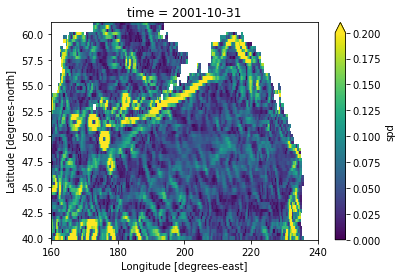

In [91]:
ds_all['spd']=np.sqrt(ds_all.u**2 + ds_all.v**2)
ds_all = ds_all.sel(lon=slice(160,240),lat=slice(61,40))
ds_all.spd[105,:,:].plot(vmin=0,vmax=.2)

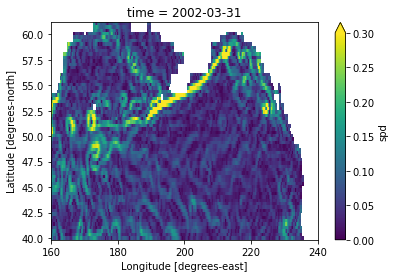

In [112]:
#ds_all2 = ds_all.sel(lon=slice(231,232),lat=50)
#ds_all2 = ds_all.sel(lon=slice(230,235),lat=50)
#print(ds_all2)
#plt.plot(ds_all2.time,ds_all2.spd)
ds_all.spd[110,:,:].plot(vmin=0,vmax=.3)

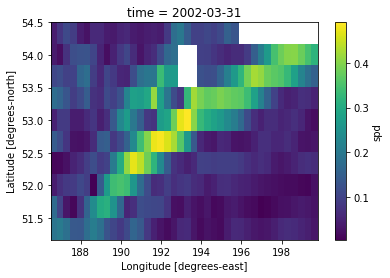

In [132]:
ds_all.spd[110,20:30,80:120].plot()


In [3]:
import xarray as xr
fname='https://podaac-opendap.jpl.nasa.gov:443/opendap/allData/ghrsst/data/GDS2/L4/GLOB/JPL/MUR/v4.1/2015/086/20150327090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'
ds=xr.open_dataset(fname)
ds

<xarray.Dataset>
Dimensions:           (lat: 17999, lon: 36000, time: 1)
Coordinates:
  * time              (time) datetime64[ns] 2015-03-27T09:00:00
  * lat               (lat) float32 -89.99 -89.98 -89.97 ... 89.97 89.98 89.99
  * lon               (lon) float32 -179.99 -179.98 -179.97 ... 179.99 180.0
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
    dt_1km_data       (time, lat, lon) timedelta64[ns] ...
Attributes:
    Conventions:                CF-1.5
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
  